###IMPORTAZIONE LIBRERIE

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

###CARICAMENTO DATASET E ANALISI ESPLORATIVA

In [ ]:
url = "hts://raw.githubusercontent.com/erkansirin78/datasets/refs/heads/master/AB_NYC_2019.csvtp"
df = pd.read_csv(url)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


###PULIZIA DEI DATI

* drop colonne non rilevanti: 'name', 'host_name', 'last_review', 'id', 'neighbourhood' (ridondante, c'è già 'neighbourhood_group')
* sostituzione dati null con la madiana per la colonna 'reviews_per_month'
* gestione outliars nella colonna target

In [ ]:
df.drop(columns=['name', 'host_name', 'last_review', 'id', 'neighbourhood', 'host_id'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   latitude                        48895 non-null  float64
 2   longitude                       48895 non-null  float64
 3   room_type                       48895 non-null  object 
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               38843 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 3.7+ MB


In [ ]:
mediana_rpm = df['reviews_per_month'].median()
df['reviews_per_month'].fillna(mediana_rpm, inplace=True)
df.isnull().sum()

<ipython-input-232-6177d7a06a1b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(mediana_rpm, inplace=True)


,0
neighbourhood_group,0
latitude,0
longitude,0
room_type,0
price,0
minimum_nights,0
number_of_reviews,0
reviews_per_month,0
calculated_host_listings_count,0
availability_365,0


In [ ]:
df = df[df['price'] < 500]

###ENCODING E NORMALIZZAZIONE

In [ ]:
categorical_features = ['neighbourhood_group', 'room_type']
numerical_features = ['latitude', 'longitude', 'minimum_nights',
                      'number_of_reviews', 'reviews_per_month',
                      'calculated_host_listings_count']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),
        ('num', MinMaxScaler(), numerical_features)
    ],
    remainder='passthrough'
)
preprocessor.fit(df)
df_encoded = preprocessor.transform(df)
df_encoded = pd.DataFrame(df_encoded, columns=preprocessor.get_feature_names_out())
df_encoded.head()


,cat__neighbourhood_group_Brooklyn,cat__neighbourhood_group_Manhattan,cat__neighbourhood_group_Queens,cat__neighbourhood_group_Staten Island,cat__room_type_Private room,cat__room_type_Shared room,num__latitude,num__longitude,num__minimum_nights,num__number_of_reviews,num__reviews_per_month,num__calculated_host_listings_count,remainder__price,remainder__availability_365
0,1.0,0.0,0.0,0.0,1.0,0.0,0.357393,0.511921,0.000000,0.014308,0.003419,0.015337,149.0,365.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.614199,0.490469,0.000000,0.071542,0.006326,0.003067,225.0,355.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.748252,0.569257,0.001601,0.000000,0.012139,0.000000,150.0,365.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.448496,0.535649,0.000000,0.429253,0.079159,0.000000,89.0,194.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.722820,0.565324,0.007206,0.014308,0.001539,0.000000,80.0,0.0


###SPLIT TEST/TRAIN

* 80% training
* 20% test

In [ ]:
X = df_encoded.drop(columns='remainder__price')
y = df_encoded['remainder__price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


###MODELLO LINEARE

Addestramento Regressione Lineare

In [ ]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

Previsione e osservazione metriche

In [ ]:
y_pred = lin_reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")

R²: 0.4180
RMSE: 64.55


###MODELLO POLINOMIALE

Addestramento polinomio di secondo grado

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_train_poly, y_train)

LinearRegression()

Cross validation

In [ ]:
X_poly = poly.fit_transform(X)

cv = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = cross_val_score(lin_reg_poly, X_poly, y, cv=cv, scoring='r2')

rmse_scores = np.sqrt(-cross_val_score(lin_reg_poly, X_poly, y, cv=cv, scoring='neg_mean_squared_error'))

print(f"Cross-Validation R² (media): {r2_scores.mean():.4f}")
print(f"Cross-Validation RMSE (media): {rmse_scores.mean():.2f}")


Cross-Validation R² (media): 0.4692
Cross-Validation RMSE (media): 61.99


Previsione polinomio di secondo grado

In [ ]:
y_pred = lin_reg_poly.predict(X_test_poly)

r2 = lin_reg_poly.score(X_test_poly, y_test)
print(f'R^2 score: {round(r2, 3)}')

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {round(mse, 3)}')


R^2 score: 0.469
Mean Squared Error: 3799.38


Grid search

In [ ]:
X = df_encoded.drop(columns='remainder__price')
y = df_encoded['remainder__price']
degrees = [1, 2, 3, 4]

results = []

cv = KFold(n_splits=5, shuffle=True, random_state=42)

for d in degrees:
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()


    r2_scores = cross_val_score(model, X_poly, y, cv=cv, scoring='r2')
    r2_mean = r2_scores.mean()


    rmse_scores = np.sqrt(-cross_val_score(model, X_poly, y, cv=cv, scoring='neg_mean_squared_error'))
    rmse_mean = rmse_scores.mean()

    results.append((d, r2_mean, rmse_mean))
    print(f"Degree {d} → R²: {r2_mean:.4f}, RMSE: {rmse_mean:.2f}")


Degree 1 → R²: 0.4242, RMSE: 64.56
Degree 2 → R²: 0.4692, RMSE: 61.99
Degree 3 → R²: 0.4844, RMSE: 61.09
Degree 4 → R²: 0.4288, RMSE: 64.23


###CONFRONTO DEI MODELLI

Modello lineare vs. Modello polinomiale di secondo grado

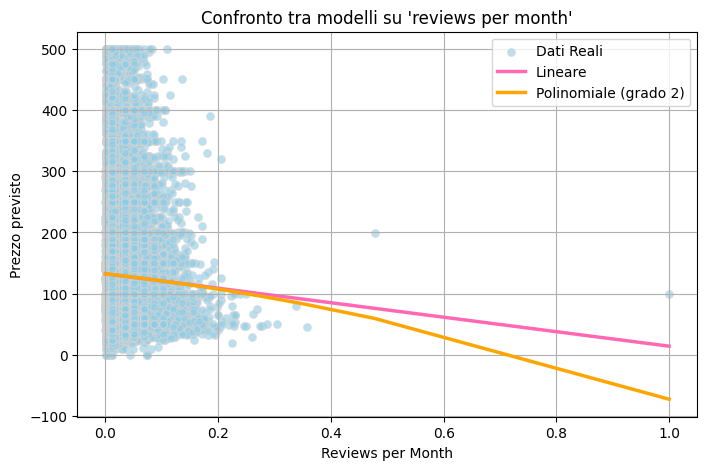

In [ ]:
X_real = df_encoded[["num__reviews_per_month"]].values
y_real = df_encoded["remainder__price"].values

lin_single = LinearRegression()
lin_single.fit(X_real, y_real)
y_pred_lin_real = lin_single.predict(X_real)

poly_feat = PolynomialFeatures(degree=2)
X_poly_real = poly_feat.fit_transform(X_real)
poly_model = LinearRegression()
poly_model.fit(X_poly_real, y_real)
y_pred_poly_real = poly_model.predict(X_poly_real)

sort_idx = X_real.flatten().argsort()
x_sorted = X_real.flatten()[sort_idx]
y_lin_sorted = y_pred_lin_real[sort_idx]
y_poly_sorted = y_pred_poly_real[sort_idx]

plt.figure(figsize=(8, 5))
plt.scatter(X_real, y_real, color='skyblue', s=30, marker='o', edgecolors='lightgray', alpha=0.6, label='Dati Reali')
plt.plot(x_sorted, y_lin_sorted, color='hotpink', linewidth=2.5, label='Lineare')
plt.plot(x_sorted, y_poly_sorted, color='orange', linewidth=2.5, label='Polinomiale (grado 2)')

plt.title("Confronto tra modelli su 'reviews per month'")
plt.xlabel("Reviews per Month")
plt.ylabel("Prezzo previsto")
plt.legend()
plt.grid(True)
plt.show()
